<a href="https://colab.research.google.com/github/oksk1111/self_machinelearning/blob/main/selfML_ch08_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 (Convolution)
- (비유) 입력 데이터에 깔때기(=필터)를 통과해 유용한 특성만 드러나게 하는 것

# 합성곱 신경망 (Convolution neural network)
- 뉴런 ≒ 필터 ≒ 커널
- 커널 = 입력에 곱하는 가중치 (도장)
- 필터 = 뉴런 개수
- 특성 맵 (feature map): 합성곱으로 얻은 출력
 - 출력으로 나오는 특성맵은 활성화 함수를 적용한 후의 것이다.
- conv2D 커널 사이즈는 보통 (3,3) or (5,5)
- 클래스에 대한 확률을 계산하려면 마지막에 밀집층(Dense)을 두는 것이 일반적이다.

##### 패딩(padding): 입력 배열의 주위에 가상 원소로 채우는 것. 보통 0으로 채운다.
- 세임패딩(same padding): 입력과 특성맵의 크기를 동일하게 만들기 위해 주위에 0으로 패딩, 모서리 데이터 손실이 적어 많이 사용!!; 입력과 만들어진 특성맵의 크기가 동일
- 밸리드패딩(valid padding): 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우

##### 스트라이드(strides): 커널 이동 칸수 지정(기본값=1). 이로 인해 출력되는 특성이 작아진다.
- (1,1) 과 같이 투플 형태로 지정도 가능하나 이런 경우는 거의 없다.
- 기본값인 1 이외의 값을 주는 경우가 거의 없다. 즉, 매개변수를 사용할 일이 없다. 

##### 풀링(pooling): 합성곱 층에서 만든 특성 맵의 가로세로 '크기'를 줄이는 역할을 수행, 특성맵의 '개수'를 줄이지는 않음.
- 예: (2(width), 2(height), 3(depth)) -> (1, 1, 3) 형태로 변경
- ⚠ 주의: 일반적으로 특성맵 안에 들어있는 값은 위 예처럼 정수가 아닌 실수값이다. (예: (2.4(width), 4.3(heght), 2(depth))
- 가중치(bias)가 없다.
- 방식: 영역 내 가장큰값(max pooling) or 평균값(average pooling)
 - MaxPooling 을 AveragePooling 보다 많이 씀. 평균은 중요한 정보를 변경한다. max 는 버리지만;
- 풀링층의 출력도 특성맵이다.
- 스트라이드는 풀링사이즈와 같다!!
- 기본적으로 패딩을 쓰지 않는다.

In [ ]:
#** test **

# 케라스의 층은 모두 keras.layers 패키지 아래
#- 2차원 합성곱 층 = Conv2D
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')    # arg1 = 필터의 개수 

# Conv2D 에 패딩 적용
keras.layers.Conv2D(10, kernel_size(3, 3), activation='relu', padding='same')

# Conv2D 에 스트라이드 적용
keras.layers.Conv2D(10, kernel_size(3, 3), activation='relu', padding='same', strides=1)

# 맥스풀링 적용 for Conv2D
keras.layers.MaxPooling2D(2) 
#- == keras.layers.MaxPooling2D(2, strides=2, padding='valid')   # 위 선언은 해당 라인과 같다.
#keras.layers.AveragePooling2D(2)   # 평균풀링 사용예

NameError: ignored

In [1]:
# 1. 데이터 불러오기
# 완전연결신경망(Dense) 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 한다. 그런데 합성곱은 2차원 이미지를 그대로 사용하기 때문에 일렬로 펼치지 않는다.
#- 하지만 입력 이미지는 항상 깊이(채널) 차원이 있어야 한다(RGB). 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만 Conv2D 층을 사용하기 위해 마지막에 이 채널 차원을 추가해야 한다.
#-- reshape() 으로 간단하게 깊이를 추가할 수 있다.
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0     # 흑백이미지이기에 깊이가 1 (RGB 이면 3)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

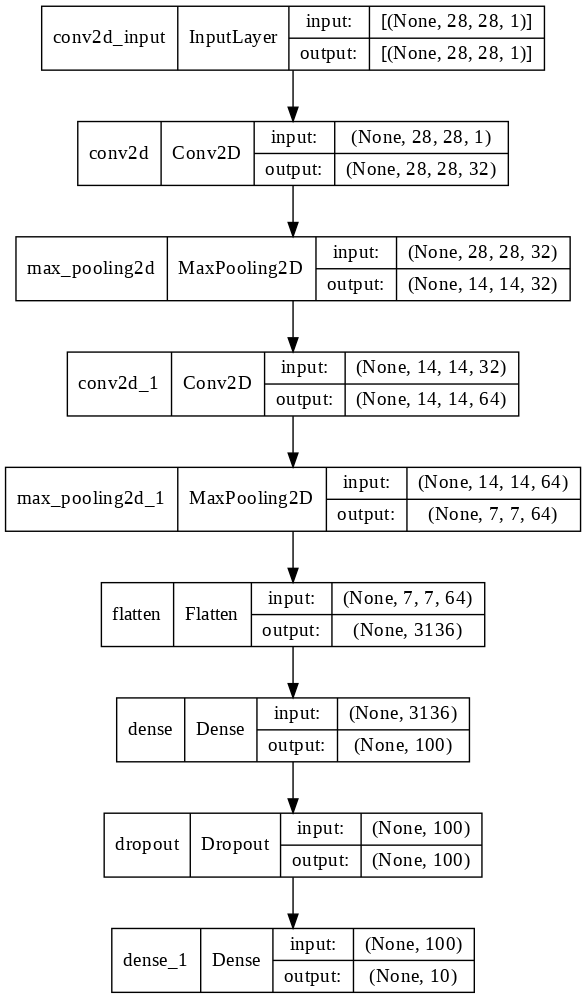

In [2]:
model = keras.Sequential()

# 1) Conv2D layer 추가 + Pooling layer 추가
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))    # (필터개수, 커널크기(3,3), input_shape=입력의차원(위에서 생성한 입력값))
#- Param 320 = kernel_size(3 * 3) * 깊이(1) * 필터개수(32) + 절편(32) 

model.add(keras.layers.MaxPooling2D(2))   # (28, 28, 32) + (2,2) 풀링 -> (14, 14, 32)

# 2) Conv2D layer 추가 + Pooling layer 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
#- Param 18496 = 3 * 3 * 깊이(32;이전 입력에서의 깊이를 따름!!) * 64 + 64

model.add(keras.layers.MaxPooling2D(2))   # (14, 14, 64) + (2,2) 풀링 -> (7, 7, 64)

# 3) 일렬화 하여 밀집층 계산 (결정해야할 클래스가 10개라서 최종 10으로 선언)
#- 은닉층 하나 추가해봄. (안해도 무방)
model.add(keras.layers.Flatten())   # 3136 = 이전입력(7 * 7 * 64)
model.add(keras.layers.Dense(100, activation='relu'))   # 313700 = 3136 * 100 + 100
model.add(keras.layers.Dropout(0.4))      # 40% Dropout - 과대적합 방지
model.add(keras.layers.Dense(10, activation='softmax')) # 1010 = 100 * 10 + 10

# 모델 구조 확인
model.summary()

# 모델 구조 도식화
#- 첫번재 상자는 입력 default 이고, 그 이후가 add 한 항목들
#keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100)

In [3]:
# 2. 훈련
#- adam 옵티마이저 이용 + ModelCheckpoint 콜백 + EarlyStopping 콜백 적용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)    # restore_best_weights=True 로 자동으로 최적의 모델값을 가지게 됨

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 16s 4ms/step - loss: 0.5214 - accuracy: 0.8112 - val_loss: 0.3353 - val_accuracy: 0.8745
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3492 - accuracy: 0.8743 - val_loss: 0.2847 - val_accuracy: 0.8908
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2957 - accuracy: 0.8936 - val_loss: 0.2525 - val_accuracy: 0.9070
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2661 - accuracy: 0.9033 - val_loss: 0.2733 - val_accuracy: 0.9014
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2406 - accuracy: 0.9119 - val_loss: 0.2300 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2198 - accuracy: 0.9194 - val_loss: 0.2284 - val_accuracy: 0.9154
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1998 - accuracy: 0.9260 - val_loss: 0.2184 - val_accuracy

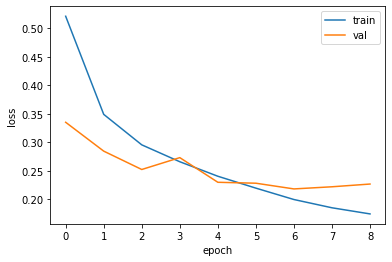

In [4]:
# 손실 그래프로 학습 정상적인지 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 아래 그림에선 7번째가 최적

In [5]:
# 3. 모델 검증
model.evaluate(val_scaled, val_target)

# 위 그림에서 7번째 epoch 와 동일!!

375/375 [==============================] - 1s 2ms/step - loss: 0.2184 - accuracy: 0.9193


[0.2183830738067627, 0.9193333387374878]

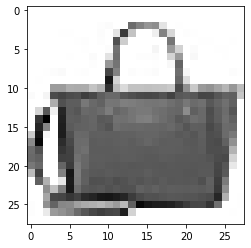

[[1.8045926e-17 1.4885557e-26 3.7557243e-21 5.9531139e-19 4.9711892e-18
  4.1773533e-19 3.3312549e-17 4.0731625e-21 1.0000000e+00 2.1768565e-22]]


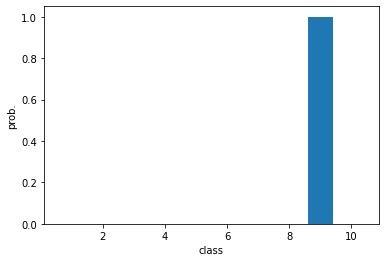

가방


In [6]:
# 4. 예측

# 이미지 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')    # val_scaled 는 학습데이터지만 여기서 새로운 샘플 가져올 수 없으므로 일단 원래 데이터로 검증
plt.show()

# 이미지의 클래스를 잘 분류하는지?
preds = model.predict(val_scaled[0:1])    #! 원소 1개라도 리스트슬라이싱으로 보내는 이유는 데이터 포맷을 지키기 위해서!!
print(preds)    # 리스트 인덱스 8번

# 위 분류를 그래프로
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

In [7]:
# 테스트 세트로 일반화 성능 측정
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)



# 다음장, 합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 학습한 내용 고찰

313/313 [==============================] - 1s 3ms/step - loss: 0.2482 - accuracy: 0.9121


[0.24822087585926056, 0.9121000170707703]

## 합성곱 신경망의 시각화를 통해 어떻게 학습했는지 확인해 보자!

[<keras.layers.convolutional.Conv2D object at 0x7f0285adf1d0>, <keras.layers.pooling.MaxPooling2D object at 0x7f02727c7d50>, <keras.layers.convolutional.Conv2D object at 0x7f0285aca4d0>, <keras.layers.pooling.MaxPooling2D object at 0x7f0285ae9d90>, <keras.layers.core.flatten.Flatten object at 0x7f0285acdf50>, <keras.layers.core.dense.Dense object at 0x7f0285acd910>, <keras.layers.core.dropout.Dropout object at 0x7f0285ae0a50>, <keras.layers.core.dense.Dense object at 0x7f0285ae7590>]
(3, 3, 1, 32) (32,)
----1
[[[[-1.42812744e-01  1.35499120e-01 -1.40759870e-02  1.24605365e-01
     2.52214950e-02 -3.78755718e-01  2.78687477e-01  1.98228300e-01
    -1.65501639e-01  1.13950111e-01  4.14248616e-01  9.98001471e-02
     2.07574874e-01  3.33095603e-02  5.18089756e-02 -1.38726588e-02
    -1.40461349e-03  7.65109435e-02 -1.45735264e+00  4.87443842e-02
    -2.58087724e-01  5.21089472e-02  1.32869303e-01 -1.53884485e-01
     8.58127140e-03  2.32936181e-02  5.71137927e-02  2.75743790e-02
    -5.70

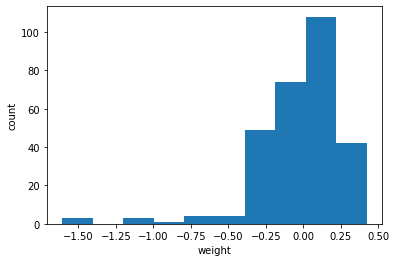

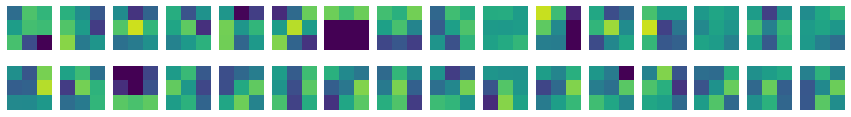

In [13]:
# 모델 불러오기; 위의 학습된 모델 데이터를 사용
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

# model 의 layers 는 파이썬 리스트
print(model.layers)

# 위 model.layers 리스트 중, 첫번째 Conv2D layer 의 가중치 조사
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)   # weights[0] = weights; weights[1] = bias
#- (커널크기3, 3, 깊이1, 필터개수32), (절편32)

print('----1')
print(conv_weights[:1])
print('----2')
print(conv_weights.reshape(-1, 1)[:10])
print('----3')

# 가중치 배열의 평균과 표준편차 - 훈련한 후의 데이터. 뒤에서 훈련전의 데이터와 비교해서 어느정도 변화가 발생했는지 알아보기 위함.
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())
#- 평균은 0에 가깝고, 표준편차는 0.24 정도

# 가중치를 히스토그램으로 - 입력인 1차원배열의 2차원형태이며, 1차원레벨이 x축 분포로 그려진다.
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))   # 히스토그램은 1차원만 그릴수 있어서 reshape 
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 32개의 커널을 출력
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0, i*16 + j], vmin=-0.5, vmax=0.5)    # vmin/vmax = 픽셀의 절대값 기준을 세워야 표시가 의도한 대로 나올 수 있다.; 위 히스토그램에서 'weight'를 기준으로 값을 주자
    axs[i, j].axis('off')
plt.show()

(3, 3, 1, 32)
-0.003372575 0.077847905


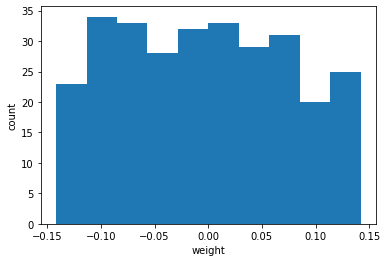

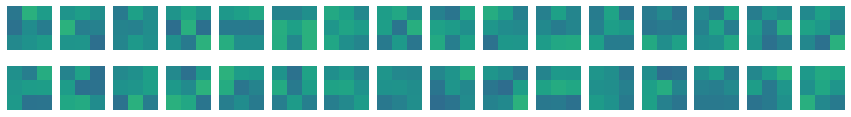

In [ ]:
# 훈련하지 않은 빈 합성곱 신경망을 만들어, 학습후의 커널과 비교
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

# 첫번째 층의 가중치 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

# 평균과 표준편차 확인
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
#- 평균은 0에 가까우나 표준편차도 합습후 데이터보다 편차가 작음
#-- 텐서플로우는 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문!!

# 가중치를 히스토그램으로
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 32개의 커널을 출력
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()
#- 가중치 필터의 변별력이 없다.

In [ ]:
#** test **
# Sequential() 을 안쓰고 함수형 API 로 중간층의 결과를 뽑아서 써보자!!!!!!!!!!!
#- 중간층의 결과를 분석하기 위함! (추후 함수형으로 쓰는 방식에 익숙해지자)

# 함수형 API테스트
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')
# model = keras.Sequential([dense1, dense2]) ↓

#! 함수형 API에서는 Sequential() 다르게 input layer를 직접 추가해 주어야 한다. keras.Input() 이용
inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


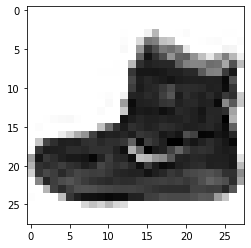

(1, 28, 28, 32)


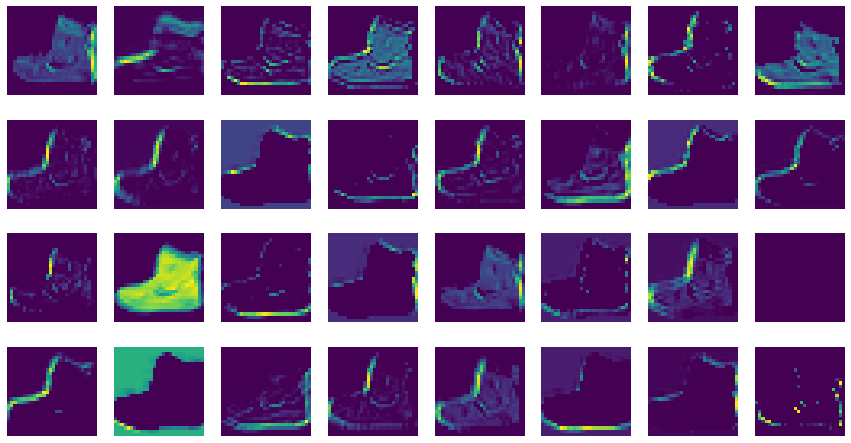

In [ ]:
# 위 예시와 같이 함수형 API를 위에 만들어진 model 에 적용하자
#- model객체 - InputLayer -> Conv2D -> Maxpooling2D -> Conv2D -> ...
#-- model객체 - InputLayer -(model.input)-> Conv2D -(model.layers[0].output)-> Maxpooling2D -> Conv2D -> ...    형태로 첫번재 Conv2D의 input과 output 검증!!

print(model.input)

# 첫번째 Conv2D layer 의 input과 output을 갖는 layer
conv_acti = keras.Model(model.input, model.layers[0].output)

# (첫번째 Conv2D layer의) 특성맵 시각화
#- 테스트를 위해 훈련세트의 첫번째 이미지 사용!
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

# 위 샘플을 단일 계층인 conv_acti 모델에 주입하여 특성맵 출력!
#- predict() 는 입력이 배치일것으로 예상하니, 단 한개의 샘플이더라도 슬라이싱으로 입력할것
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

# 특성맵 크기 확인
print(feature_maps.shape)   # 샘플이 한개이기에 (1, ...) 이 된다.

# 특성맵 이미지 확인 (총 32개의 특성)
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()